In [1]:
import torch
import pickle
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from soft_thresholding.SoftThresholdNet import SoftThresholdNet

from PlainNet import PlainNet
from duffing_dataset import *

In [2]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
t = torch.linspace(0, data.DT * len(data.x), len(data.y))

training_loader = DataLoader(data, batch_size=200, shuffle=True)

In [65]:
model = SoftThresholdNet(3, [[24, 24], [24, 24]], 2, s_init=1)

In [66]:
model.train_n_epochs(training_loader=training_loader, n_epochs = 1000, lr = 0.00001, weight_decay=0.0001, verbose=True)

Epoch 0: loss 43.667869567871094
Epoch 100: loss 5.19620418548584
Epoch 200: loss 0.5460951328277588
Epoch 300: loss 0.5304467082023621
Epoch 400: loss 0.19202931225299835
Epoch 500: loss 0.15478481352329254
Epoch 600: loss 0.15318085253238678
Epoch 700: loss 0.13532239198684692
Epoch 800: loss 0.12264803797006607
Epoch 900: loss 0.1449335813522339


In [67]:
y_pred = model(training_loader.dataset.x)

In [68]:
torch.sum((y_pred - training_loader.dataset.y)**2) / len(training_loader.dataset.y)

tensor(0.2443, grad_fn=<DivBackward0>)

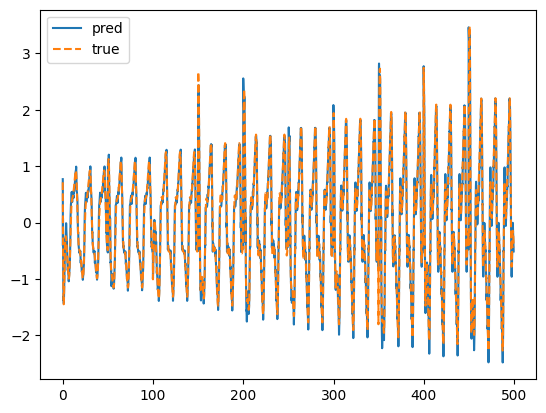

In [69]:
plt.plot(t, y_pred[:, 0].detach().numpy(), label='pred')
plt.plot(t, training_loader.dataset.y[:, 0].detach().numpy(), label='true', linestyle='--')
plt.legend()

In [70]:

s_threshhold = [layer.s.detach().item() for layer in model.layers]

In [71]:
s_threshhold

[0.17677289247512817,
 0.1720905900001526,
 0.038228508085012436,
 0.149700328707695]

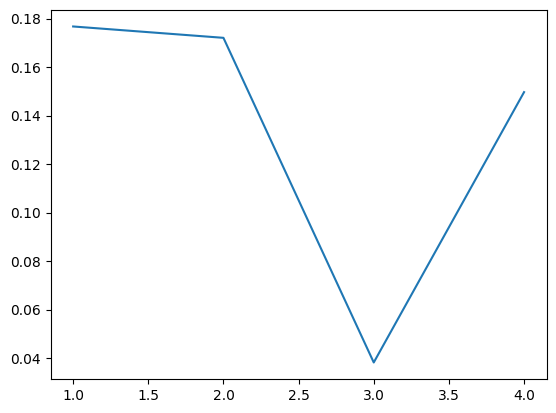

In [72]:
plt.plot(np.linspace(1, len(s_threshhold), len(s_threshhold)), s_threshhold)

In [75]:
model.get_sparsity()

tensor(0.4906)

In [74]:
model.layers[0].get_sparse_weights()

tensor([[-1.5864, -0.7553,  0.1455,  0.0000,  0.8028, -0.0000,  1.1435, -0.0000,
         -0.0000,  0.4273, -0.0000, -0.0397, -0.5706,  0.0000,  0.5617, -0.1788,
         -0.3519, -0.1427, -0.1765, -0.0000,  0.0000, -0.0000, -0.7110, -0.7521],
        [ 0.0000,  0.2057,  0.6818,  0.0000, -1.4766, -0.5758,  0.4818, -0.0000,
          0.0000, -0.3208, -0.4396,  0.0000, -0.4640, -0.3668,  0.7546,  1.0760,
          0.6800, -0.0449,  0.0000,  0.2655, -0.5311, -0.0000, -0.6909, -0.0000],
        [-0.0000, -0.4354,  0.9259,  0.0000, -0.7067, -0.0000, -1.1622,  0.0000,
          0.9064, -0.0000,  0.0000,  0.0000,  0.0000, -0.4714,  0.0000,  1.0329,
          0.3510, -0.1812, -0.0000, -0.3892,  0.4662, -0.8253, -0.0000, -0.0000]],
       grad_fn=<MulBackward0>)